In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Tabla retrieved from UniProt with metadata of 152 CREs proteins (05/07/2022)
metadata = pd.read_csv('../raw_data/uniprot-metadata.tsv.gz', sep= '\t', compression= 'gzip')

In [3]:
kw_ontology = pd.read_csv('../raw_data/uniprot-compressed_keywords_ontology.tsv.gz', compression= 'gzip', sep= '\t')

In [4]:
kw_ontology.columns = kw_ontology.columns.str.lower().str.replace(" ", "_")

In [5]:
kw_ontology.tail(20)

,keyword_id,name,category,gene_ontologies
1181,KW-1275,Proton-gated sodium channel impairing toxin,Molecular function,NaN
1182,KW-1276,Viral latency initiation and maintenance,Biological process,NaN
1183,KW-1277,Toxin-antitoxin system,Biological process,NaN
1184,KW-1278,Translocase,Molecular function,NaN
1185,KW-1279,T cell receptor,Cellular component,GO:0042101:T cell receptor complex
1186,KW-1280,Immunoglobulin,Cellular component,GO:0019814:immunoglobulin complex
1187,KW-1281,Magnetosome,Cellular component,GO:0110143:magnetosome
1188,KW-1282,Carboxysome,Cellular component,GO:0031470:carboxysome
1189,KW-1283,Bacterial microcompartment,Cellular component,NaN
1190,KW-1284,Encapsulin nanocompartment,Cellular component,NaN


In [6]:
# Drop the last 10 rows
kw_ontology = kw_ontology.iloc[:-10]

In [7]:
kw_ontology

,keyword_id,name,category,gene_ontologies
0,KW-0001,2Fe-2S,Ligand,"GO:0051537:2 iron, 2 sulfur cluster binding"
1,KW-0002,3D-structure,Technical term,NaN
2,KW-0003,3Fe-4S,Ligand,"GO:0051538:3 iron, 4 sulfur cluster binding"
3,KW-0004,4Fe-4S,Ligand,"GO:0051539:4 iron, 4 sulfur cluster binding"
4,KW-0005,Acetoin biosynthesis,Biological process,GO:0045151:acetoin biosynthetic process
...,...,...,...,...
1186,KW-1280,Immunoglobulin,Cellular component,GO:0019814:immunoglobulin complex
1187,KW-1281,Magnetosome,Cellular component,GO:0110143:magnetosome
1188,KW-1282,Carboxysome,Cellular component,GO:0031470:carboxysome
1189,KW-1283,Bacterial microcompartment,Cellular component,NaN


In [8]:
kw_ontology[['keyword_id', 'category']]

,keyword_id,category
0,KW-0001,Ligand
1,KW-0002,Technical term
2,KW-0003,Ligand
3,KW-0004,Ligand
4,KW-0005,Biological process
...,...,...
1186,KW-1280,Cellular component
1187,KW-1281,Cellular component
1188,KW-1282,Cellular component
1189,KW-1283,Cellular component


In [9]:
metadata.head()

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Keywords,Keyword ID,Interacts with,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology IDs
0,P13864,P13864,reviewed,DNMT1_MOUSE,"DNA (cytosine-5)-methyltransferase 1, Dnmt1, M...",Dnmt1 Dnmt Met1 Uim,Mus musculus (Mouse),1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,3D-structure;Acetylation;Activator;Allosteric ...,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,O09106,cellular response to amino acid stimulus [GO:0...,cytoplasm [GO:0005737]; heterochromatin [GO:00...,chromatin binding [GO:0003682]; DNA (cytosine-...,GO:0000122; GO:0000792; GO:0003677; GO:0003682...
1,P20226,P20226,reviewed,TBP_HUMAN,TATA-box-binding protein (TATA sequence-bindin...,TBP GTF2D1 TF2D TFIID,Homo sapiens (Human),339,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...,3D-structure;Alternative splicing;Disease vari...,KW-0002; KW-0025; KW-0225; KW-0238; KW-0945; K...,P05067; Q00535; O60869-1; P52655; P52657; Q004...,"DNA-templated transcription, initiation [GO:00...",chromatin [GO:0000785]; cytoplasm [GO:0005737]...,aryl hydrocarbon receptor binding [GO:0017162]...,GO:0000785; GO:0000791; GO:0000976; GO:0000978...
2,Q62073,Q62073,reviewed,M3K7_MOUSE,Mitogen-activated protein kinase kinase kinase...,Map3k7 Tak1,Mus musculus (Mouse),579,MSTASAASSSSSSSASEMIEAPSQVLNFEEIDYKEIEVEEVVGRGA...,Apoptosis;ATP-binding;Cell membrane;Cytoplasm;...,KW-0053; KW-0067; KW-1003; KW-0963; KW-1017; K...,Q9WVI9-2; P70340; Q8CF89; Q99K90; P39429; Q9NY...,activation of NF-kappaB-inducing kinase activi...,ATAC complex [GO:0140672]; cytosol [GO:0005829...,ATP binding [GO:0005524]; identical protein bi...,GO:0000165; GO:0000287; GO:0001525; GO:0001649...
3,P06782,P06782,reviewed,SNF1_YEAST,"Carbon catabolite-derepressing protein kinase,...",SNF1 CAT1 CCR1 GLC2 PAS14 YDR477W D8035.20,Saccharomyces cerevisiae (strain ATCC 204508 /...,633,MSSNNNTNTAPANANSSHHHHHHHHHHHHHGHGGSNSTLNNPKSSL...,3D-structure;ATP-binding;Carbohydrate metaboli...,KW-0002; KW-0067; KW-0119; KW-0963; KW-0903; K...,Q00684; Q04739; P22211; Q00816; P38232; P34164...,carbohydrate metabolic process [GO:0005975]; c...,cellular bud neck septin ring [GO:0000144]; cy...,AMP-activated protein kinase activity [GO:0004...,GO:0000132; GO:0000144; GO:0001403; GO:0004672...
4,P10644,P10644,reviewed,KAP0_HUMAN,cAMP-dependent protein kinase type I-alpha reg...,PRKAR1A PKR1 PRKAR1 TSE1,Homo sapiens (Human),381,MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERP...,3D-structure;Acetylation;Alternative splicing;...,KW-0002; KW-0007; KW-0025; KW-0114; KW-0116; K...,Q9GZX7; P24588; O43687-2; Q9H6J7-2; Q9BSF0; Q8...,cardiac muscle cell proliferation [GO:0060038]...,cAMP-dependent protein kinase complex [GO:0005...,cAMP binding [GO:0030552]; cAMP-dependent prot...,GO:0001707; GO:0004862; GO:0005737; GO:0005771...


In [10]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   From                                151 non-null    object
 1   Entry                               151 non-null    object
 2   Reviewed                            151 non-null    object
 3   Entry Name                          151 non-null    object
 4   Protein names                       151 non-null    object
 5   Gene Names                          147 non-null    object
 6   Organism                            151 non-null    object
 7   Length                              151 non-null    int64 
 8   Sequence                            151 non-null    object
 9   Keywords                            151 non-null    object
 10  Keyword ID                          151 non-null    object
 11  Interacts with                      121 non-null    object

In [11]:
metadata.columns = metadata.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
metadata.columns

<ipython-input-11-6a6db343b818>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  metadata.columns = metadata.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['from', 'entry', 'reviewed', 'entry_name', 'protein_names',
       'gene_names', 'organism', 'length', 'sequence', 'keywords',
       'keyword_id', 'interacts_with', 'gene_ontology_biological_process',
       'gene_ontology_cellular_component', 'gene_ontology_molecular_function',
       'gene_ontology_ids'],
      dtype='object')

In [12]:
# Complete list of uniprot accesions (151)
uniprots = pd.read_csv('../datasets/uniprots_list.txt', header= None, sep= '\n', names= ['entry'])

In [13]:
# Uniprot entry that is not retrieved from the uniprot search
uniprots.entry[~uniprots.entry.isin(metadata['from'])] # Ok, they all matched

Series([], Name: entry, dtype: object)

In [14]:
metadata.reviewed.value_counts()

reviewed      144
unreviewed      7
Name: reviewed, dtype: int64

In [15]:
metadata[['entry', 'reviewed', 'entry_name', 'organism', 'length', 'keywords', 'keyword_id']]

,entry,reviewed,entry_name,organism,length,keywords,keyword_id
0,P13864,reviewed,DNMT1_MOUSE,Mus musculus (Mouse),1620,3D-structure;Acetylation;Activator;Allosteric ...,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...
1,P20226,reviewed,TBP_HUMAN,Homo sapiens (Human),339,3D-structure;Alternative splicing;Disease vari...,KW-0002; KW-0025; KW-0225; KW-0238; KW-0945; K...
2,Q62073,reviewed,M3K7_MOUSE,Mus musculus (Mouse),579,Apoptosis;ATP-binding;Cell membrane;Cytoplasm;...,KW-0053; KW-0067; KW-1003; KW-0963; KW-1017; K...
3,P06782,reviewed,SNF1_YEAST,Saccharomyces cerevisiae (strain ATCC 204508 /...,633,3D-structure;ATP-binding;Carbohydrate metaboli...,KW-0002; KW-0067; KW-0119; KW-0963; KW-0903; K...
4,P10644,reviewed,KAP0_HUMAN,Homo sapiens (Human),381,3D-structure;Acetylation;Alternative splicing;...,KW-0002; KW-0007; KW-0025; KW-0114; KW-0116; K...
...,...,...,...,...,...,...,...
146,Q3UP24,reviewed,NLRC4_MOUSE,Mus musculus (Mouse),1024,3D-structure;Apoptosis;ATP-binding;Cytoplasm;I...,KW-0002; KW-0053; KW-0067; KW-0963; KW-0391; K...
147,Q9JK66,reviewed,PRKN_RAT,Rattus norvegicus (Rat),465,3D-structure;Alternative splicing;Autophagy;Ce...,KW-0002; KW-0025; KW-0072; KW-0965; KW-0966; K...
148,Q15691,reviewed,MARE1_HUMAN,Homo sapiens (Human),268,3D-structure;Acetylation;Cell cycle;Cell divis...,KW-0002; KW-0007; KW-0131; KW-0132; KW-0963; K...
149,P04521,reviewed,EXO1_BPT4,Enterobacteria phage T4 (Bacteriophage T4),339,Bacterial host gene expression shutoff by viru...,KW-1261; KW-1247; KW-0227; KW-0234; KW-0238; K...


In [16]:
metadata.organism.value_counts()

Homo sapiens (Human)                                                                                           88
Mus musculus (Mouse)                                                                                           22
Rattus norvegicus (Rat)                                                                                         6
Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)                                           5
Drosophila melanogaster (Fruit fly)                                                                             5
Schizosaccharomyces pombe (strain 972 / ATCC 24843) (Fission yeast)                                             4
Gallus gallus (Chicken)                                                                                         4
Caenorhabditis elegans                                                                                          3
Escherichia coli (strain K12)                                                           

# Functions

## Based on UniProtKB keywords

In [17]:
metadata.keywords.apply(lambda x:  x.split(';'))

0      [3D-structure, Acetylation, Activator, Alloste...
1      [3D-structure, Alternative splicing, Disease v...
2      [Apoptosis, ATP-binding, Cell membrane, Cytopl...
3      [3D-structure, ATP-binding, Carbohydrate metab...
4      [3D-structure, Acetylation, Alternative splici...
                             ...                        
146    [3D-structure, Apoptosis, ATP-binding, Cytopla...
147    [3D-structure, Alternative splicing, Autophagy...
148    [3D-structure, Acetylation, Cell cycle, Cell d...
149    [Bacterial host gene expression shutoff by vir...
150    [3D-structure, Acetylation, ATP-binding, Cytop...
Name: keywords, Length: 151, dtype: object

In [18]:
splited_kw = metadata.keywords.apply(lambda x:  x.split(';'))

In [19]:
kw = pd.concat([metadata[['entry', 'keyword_id']], splited_kw], axis= 1).explode('keywords')
kw

,entry,keyword_id,keywords
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,3D-structure
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Acetylation
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Activator
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Allosteric enzyme
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Alternative splicing
...,...,...,...
150,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Serine/threonine-protein kinase
150,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Transferase
150,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Tumor suppressor
150,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Zinc


In [20]:
kw_ontology

,keyword_id,name,category,gene_ontologies
0,KW-0001,2Fe-2S,Ligand,"GO:0051537:2 iron, 2 sulfur cluster binding"
1,KW-0002,3D-structure,Technical term,NaN
2,KW-0003,3Fe-4S,Ligand,"GO:0051538:3 iron, 4 sulfur cluster binding"
3,KW-0004,4Fe-4S,Ligand,"GO:0051539:4 iron, 4 sulfur cluster binding"
4,KW-0005,Acetoin biosynthesis,Biological process,GO:0045151:acetoin biosynthetic process
...,...,...,...,...
1186,KW-1280,Immunoglobulin,Cellular component,GO:0019814:immunoglobulin complex
1187,KW-1281,Magnetosome,Cellular component,GO:0110143:magnetosome
1188,KW-1282,Carboxysome,Cellular component,GO:0031470:carboxysome
1189,KW-1283,Bacterial microcompartment,Cellular component,NaN


In [22]:
# Add the uniprot categories for the keywords
kw = kw.merge(kw_ontology, left_on= 'keywords', right_on= 'name', how= 'left')
kw

,entry,keyword_id_x,keywords,keyword_id_y,name,category,gene_ontologies
0,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,3D-structure,KW-0002,3D-structure,Technical term,NaN
1,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Acetylation,KW-0007,Acetylation,PTM,NaN
2,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Activator,KW-0010,Activator,Molecular function,NaN
3,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Allosteric enzyme,KW-0021,Allosteric enzyme,Molecular function,"GO:0003824:catalytic activity, GO:0008152:meta..."
4,P13864,KW-0002; KW-0007; KW-0010; KW-0021; KW-0025; K...,Alternative splicing,KW-0025,Alternative splicing,Coding sequence diversity,NaN
...,...,...,...,...,...,...,...
2364,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Serine/threonine-protein kinase,KW-0723,Serine/threonine-protein kinase,Molecular function,GO:0004674:protein serine/threonine kinase act...
2365,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Transferase,KW-0808,Transferase,Molecular function,GO:0016740:transferase activity
2366,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Tumor suppressor,KW-0043,Tumor suppressor,Disease,NaN
2367,P41743,KW-0002; KW-0007; KW-0067; KW-0963; KW-0967; K...,Zinc,KW-0862,Zinc,Ligand,NaN


In [23]:
kw[['entry', 'keywords', 'category']]

,entry,keywords,category
0,P13864,3D-structure,Technical term
1,P13864,Acetylation,PTM
2,P13864,Activator,Molecular function
3,P13864,Allosteric enzyme,Molecular function
4,P13864,Alternative splicing,Coding sequence diversity
...,...,...,...
2364,P41743,Serine/threonine-protein kinase,Molecular function
2365,P41743,Transferase,Molecular function
2366,P41743,Tumor suppressor,Disease
2367,P41743,Zinc,Ligand


In [42]:
kw.keywords.value_counts(ascending=True).iloc[-20:]

Transcription                 34
Transcription regulation      34
Disease variant               35
Acetylation                   38
Direct protein sequencing     40
Metal-binding                 43
Kinase                        44
ATP-binding                   49
Transferase                   52
Ubl conjugation               53
Nucleotide-binding            54
Cell membrane                 56
Repeat                        59
Nucleus                       68
Membrane                      78
Alternative splicing          87
Cytoplasm                    100
Phosphoprotein               120
3D-structure                 123
Reference proteome           141
Name: keywords, dtype: int64

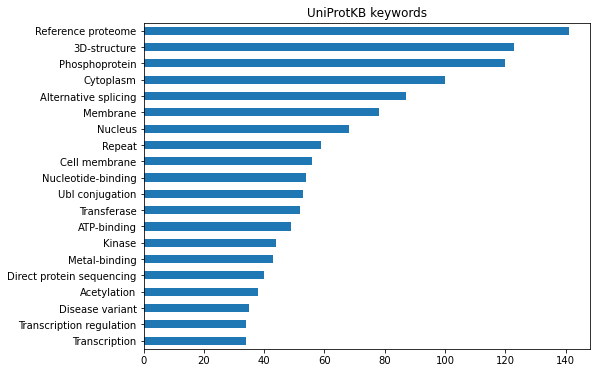

In [43]:
plt.subplots(figsize=(8,6))
kw.keywords.value_counts(ascending=True).iloc[-20:].plot(kind = 'barh')
plt.title("UniProtKB keywords")
plt.show()

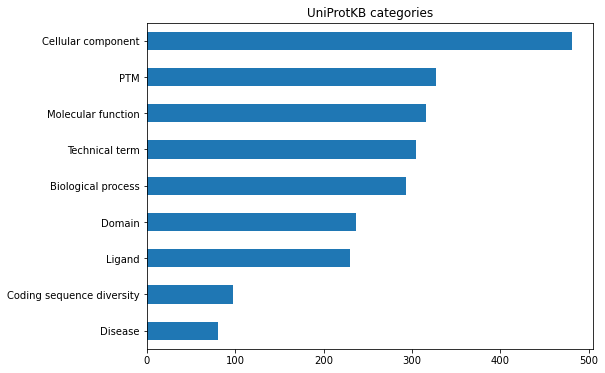

In [44]:
plt.subplots(figsize=(8,6))
kw.category.value_counts(ascending=True).plot(kind = 'barh')
plt.title("UniProtKB categories")
plt.show()

## Based on GO terms

In [45]:
metadata[['entry', 'gene_ontology_molecular_function']]

,entry,gene_ontology_molecular_function
0,P13864,chromatin binding [GO:0003682]; DNA (cytosine-...
1,P20226,aryl hydrocarbon receptor binding [GO:0017162]...
2,Q62073,ATP binding [GO:0005524]; identical protein bi...
3,P06782,AMP-activated protein kinase activity [GO:0004...
4,P10644,cAMP binding [GO:0030552]; cAMP-dependent prot...
...,...,...
146,Q3UP24,ATP binding [GO:0005524]; caspase binding [GO:...
147,Q9JK66,actin binding [GO:0003779]; beta-catenin bindi...
148,Q15691,cadherin binding [GO:0045296]; identical prote...
149,P04521,DNA binding [GO:0003677]; exonuclease activity...


In [46]:
metadata.gene_ontology_molecular_function.isna().sum()

1

In [74]:
go_mf = metadata.gene_ontology_molecular_function.dropna().apply(lambda x: x.split(';'))
go_mf

0      [chromatin binding [GO:0003682],  DNA (cytosin...
1      [aryl hydrocarbon receptor binding [GO:0017162...
2      [ATP binding [GO:0005524],  identical protein ...
3      [AMP-activated protein kinase activity [GO:000...
4      [cAMP binding [GO:0030552],  cAMP-dependent pr...
                             ...                        
146    [ATP binding [GO:0005524],  caspase binding [G...
147    [actin binding [GO:0003779],  beta-catenin bin...
148    [cadherin binding [GO:0045296],  identical pro...
149    [DNA binding [GO:0003677],  exonuclease activi...
150    [ATP binding [GO:0005524],  calcium-dependent ...
Name: gene_ontology_molecular_function, Length: 150, dtype: object

In [75]:
go_mf = metadata[['entry']].join(go_mf)
go_mf

,entry,gene_ontology_molecular_function
0,P13864,"[chromatin binding [GO:0003682], DNA (cytosin..."
1,P20226,[aryl hydrocarbon receptor binding [GO:0017162...
2,Q62073,"[ATP binding [GO:0005524], identical protein ..."
3,P06782,[AMP-activated protein kinase activity [GO:000...
4,P10644,"[cAMP binding [GO:0030552], cAMP-dependent pr..."
...,...,...
146,Q3UP24,"[ATP binding [GO:0005524], caspase binding [G..."
147,Q9JK66,"[actin binding [GO:0003779], beta-catenin bin..."
148,Q15691,"[cadherin binding [GO:0045296], identical pro..."
149,P04521,"[DNA binding [GO:0003677], exonuclease activi..."


In [76]:
go_mf = go_mf.explode('gene_ontology_molecular_function')
go_mf.dropna(inplace= True)
go_mf

,entry,gene_ontology_molecular_function
0,P13864,chromatin binding [GO:0003682]
0,P13864,DNA (cytosine-5-)-methyltransferase activity ...
0,P13864,"DNA (cytosine-5-)-methyltransferase activity,..."
0,P13864,DNA binding [GO:0003677]
0,P13864,DNA-methyltransferase activity [GO:0009008]
...,...,...
150,P41743,protein kinase activity [GO:0004672]
150,P41743,protein kinase C activity [GO:0004697]
150,P41743,protein serine kinase activity [GO:0106310]
150,P41743,protein serine/threonine kinase activity [GO:...


In [77]:
go_mf.gene_ontology_molecular_function= go_mf.gene_ontology_molecular_function.apply(lambda x: re.findall("(\w.*)\[.*\]$", x))
go_mf.gene_ontology_molecular_function = go_mf.gene_ontology_molecular_function.apply(lambda x: x[0])
go_mf.gene_ontology_molecular_function = go_mf.gene_ontology_molecular_function.str.strip()
go_mf.gene_ontology_molecular_function

0                                      chromatin binding
0           DNA (cytosine-5-)-methyltransferase activity
0      DNA (cytosine-5-)-methyltransferase activity, ...
0                                            DNA binding
0                         DNA-methyltransferase activity
                             ...                        
150                              protein kinase activity
150                            protein kinase C activity
150                       protein serine kinase activity
150             protein serine/threonine kinase activity
150    protein serine/threonine/tyrosine kinase activity
Name: gene_ontology_molecular_function, Length: 1096, dtype: object

In [78]:
go_mf.gene_ontology_molecular_function.isna().sum()

0

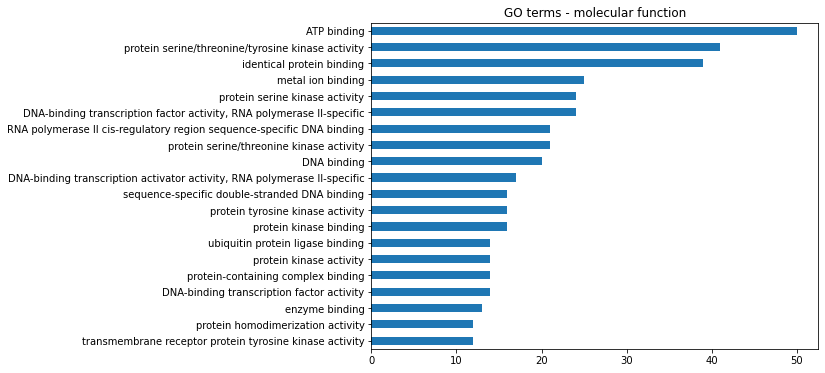

In [80]:
plt.subplots(figsize=(8,6))
go_mf.gene_ontology_molecular_function.value_counts(ascending=True).iloc[-20:].plot(kind = 'barh')
plt.title("GO terms - molecular function")
plt.show()